In [1]:
!pip install scikit-learn nltk wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Sarika
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sarika
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans

from wordcloud import WordCloud


In [3]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to C:\Users\Sarika
[nltk_data]     Agarwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), subset='all')
documents = newsgroups.data
print(f"Total Documents: {len(documents)}")

Total Documents: 18846


In [17]:
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'\W+', ' ', text.lower())
    text = re.sub(r'\d+', '', text)
    tokens = [word for word in text.split() if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization step
    return ' '.join(tokens)


In [6]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(documents_clean)

In [7]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X_count = count_vectorizer.fit_transform(documents_clean)

In [8]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_tfidf)
labels = kmeans.labels_

In [14]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_tfidf, labels)
print(f"Silhouette Score for K-Means: {score:.4f}")

Silhouette Score for K-Means: -0.0064


In [9]:
def top_terms_per_cluster(kmeans, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    
    for i in range(k):
        print(f"Cluster {i}:")
        print(", ".join([terms[ind] for ind in order_centroids[i, :n_terms]]))
        print()

top_terms_per_cluster(kmeans, tfidf_vectorizer)


Cluster 0:
compaq, bytes, configuration, machine, diagnostics, diskettes, incorrectly, diskette, cmos, dealers

Cluster 1:
unless, sternlight, vesselin, nah, asleep, succeed, dorothy, jerk, wake, sophisticated

Cluster 2:
homosexual, sin, indulge, misfortune, defective, concepts, entitled, distinction, homosexuals, forum

Cluster 3:
xview, eric, checked, copy, exactly, check, pc, program, looking, called

Cluster 4:
people, like, think, know, good, time, god, say, right, new

Cluster 5:
key, super, filler, conceal, encryption, replay, clipper, knows, easy, unless

Cluster 6:
flesh, sodom, lust, angels, homosexuality, jude, sodomites, specious, verse, messengers

Cluster 7:
drive, scsi, mb, ide, hard, disk, drives, controller, floppy, bus

Cluster 8:
com, irq, netcom, feustel, port, modem, mail, tek, ibm, ports

Cluster 9:
min, goal, puck, rus, usa, fin, sweden, lindros, shot, swe

Cluster 10:
force, immoral, obliged, preserve, pacifism, self, effectively, thing, use, prescribe

Cluster

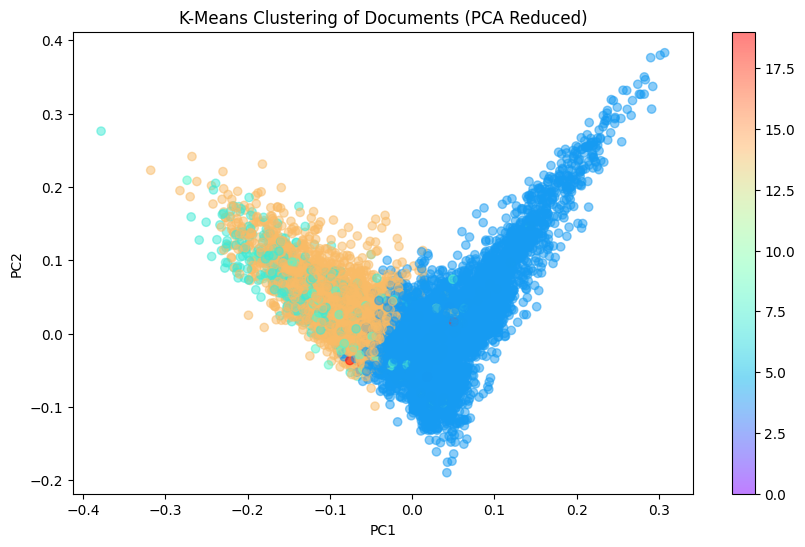

In [15]:
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X_tfidf.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='rainbow', alpha=0.5)
plt.title("K-Means Clustering of Documents (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()


In [10]:
lda = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', random_state=42)
lda.fit(X_count)

LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42)

In [12]:
def display_topics(model, feature_names, no_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

display_topics(lda, count_vectorizer.get_feature_names_out())

Topic 0:
space, nasa, earth, center, cost, launch, station, mission, orbit, moon

Topic 1:
um, mk, mp, id, mh, ar, toolkit, paragraph, mr, pu

Topic 2:
like, good, car, time, got, really, better, went, way, little

Topic 3:
file, image, ftp, files, graphics, program, window, use, version, server

Topic 4:
san, ed, league, pp, chicago, hockey, ah, st, __, mv

Topic 5:
game, team, games, year, play, season, players, win, la, period

Topic 6:
key, chip, encryption, keys, clipper, use, serial, privacy, security, data

Topic 7:
power, db, water, air, ground, energy, light, condition, heat, current

Topic 8:
ax, max, gv, bf, di, tm, bhj, giz, wm, cx

Topic 9:
time, used, use, book, example, read, non, point, different, information

Topic 10:
information, scsi, data, computer, research, university, april, new, mail, internet

Topic 11:
israel, jews, jewish, world, war, religion, israeli, religious, turkey, existence

Topic 12:
said, people, children, mr, going, president, day, told, time, fbi

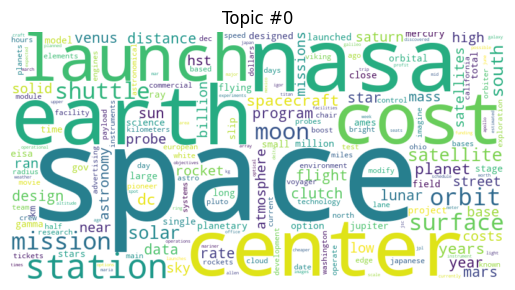

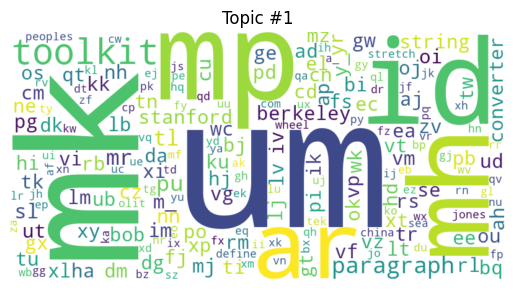

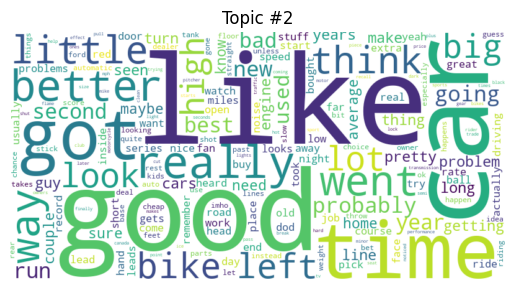

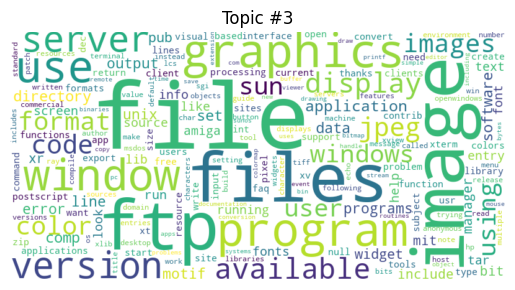

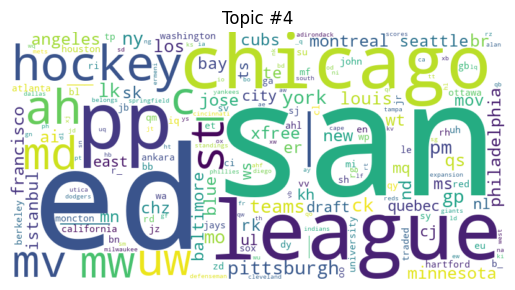

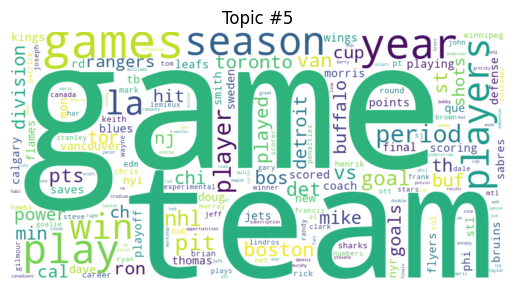

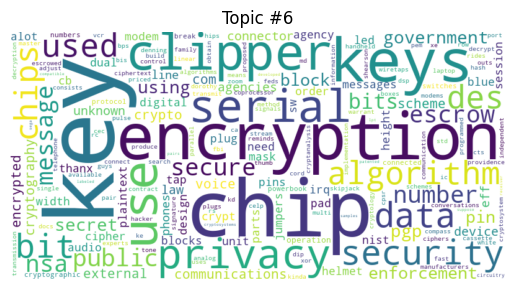

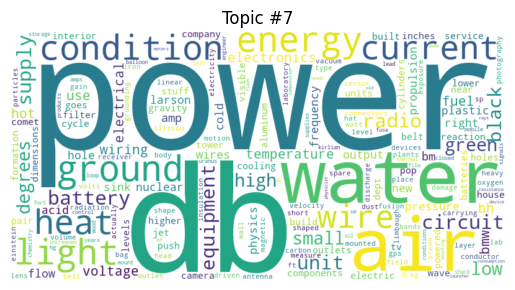

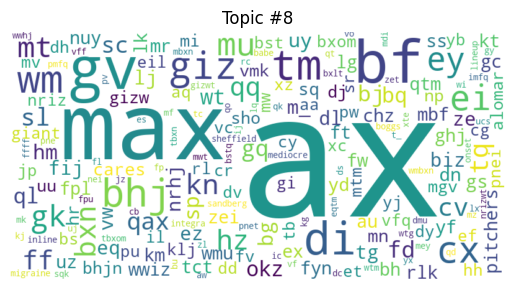

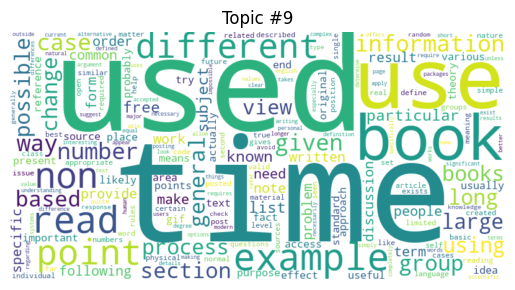

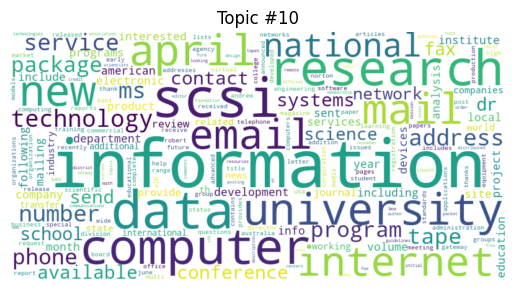

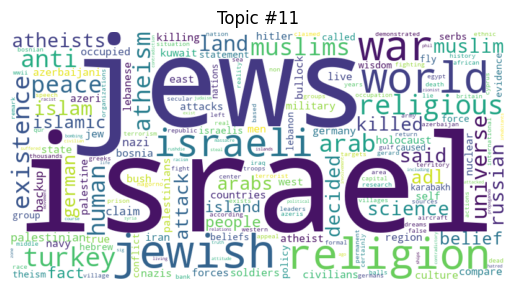

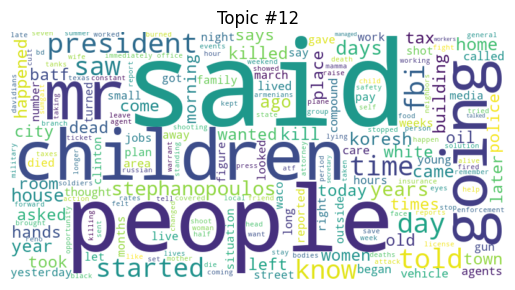

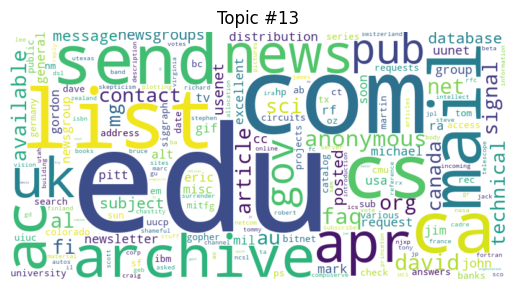

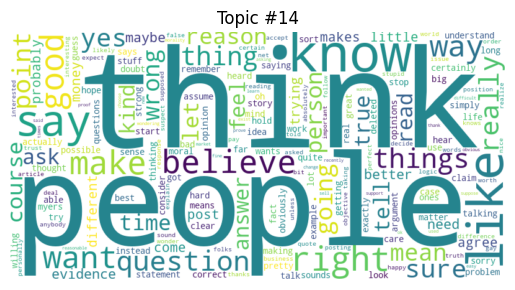

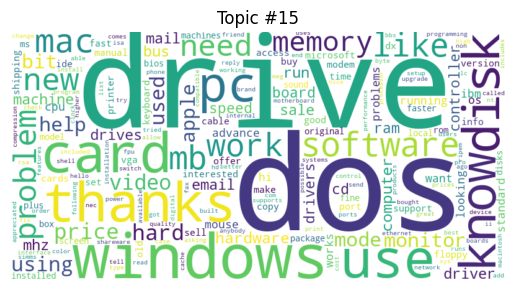

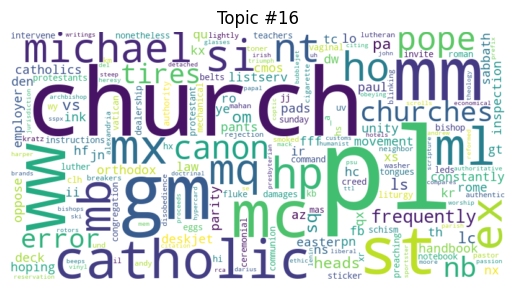

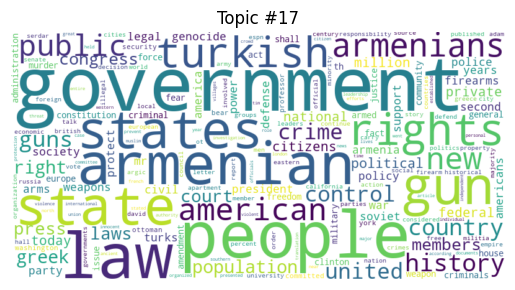

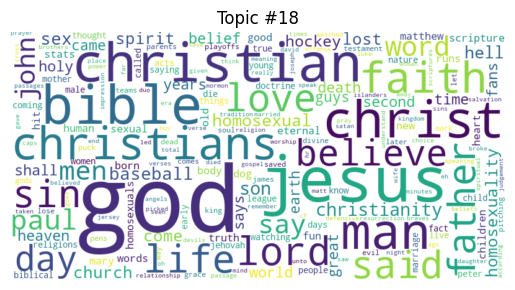

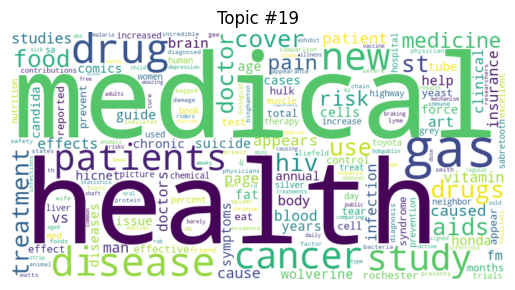

In [13]:
for i, topic in enumerate(lda.components_):
    plt.figure()
    wordcloud = WordCloud(width=800, height=400, background_color='white') \
                .generate_from_frequencies(dict(zip(count_vectorizer.get_feature_names_out(), topic)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic #{i}")
    plt.show()
